# Aadhaar Update Pressure Analysis

# Aadhaar Update Pressure Analysis

**UIDAI Data Hackathon Project**

This notebook analyzes anonymised Aadhaar enrolment and update datasets to identify
operational stress across Indian states. The analysis focuses on understanding how
demographic and biometric update workloads compare to new enrolments, and how this
shift impacts service delivery planning.


## 1. Problem Context

Aadhaar is a foundational digital identity system supporting governance, public service
delivery, and financial inclusion across India. While Aadhaar enrolment has largely
stabilized across most states, update requests continue to grow due to factors such as
migration, demographic corrections, and periodic biometric refresh requirements.

This transition from an enrolment-driven system to an update-driven service model
creates operational challenges. Regions with high update demand may experience service
delays, infrastructure strain, and resource misallocation if workloads are not properly
monitored and planned.


## 2. Objective of the Study

The objective of this analysis is to identify regional and temporal patterns in Aadhaar
enrolment and update activity, with a specific focus on detecting states where update
workloads significantly exceed new enrolments.

The study aims to generate actionable insights that can support informed decision-making,
capacity planning, and service delivery optimization for Aadhaar operations.


## 3. Datasets Description

The analysis is based on anonymised and aggregated datasets released as part of the UIDAI
Data Hackathon initiative. The datasets include:

### Aadhaar Enrolment Dataset
- State-wise enrolment counts
- Segmented by age groups (0–5, 5–17, 18+)
- Used to analyze new Aadhaar registrations over time

### Aadhaar Demographic Update Dataset
- Records demographic corrections such as name and address updates
- Segmented by age group and state
- Used to assess non-biometric update workload

### Aadhaar Biometric Update Dataset
- Captures biometric updates including fingerprint and iris refresh
- Segmented by age group and state
- Used to evaluate biometric update-driven operational load


## 4. Data Cleaning and Preparation

Before analysis, the datasets were inspected for completeness and consistency. The
following preprocessing steps were applied:

- Standardization of date formats for temporal analysis
- Removal of records with missing or inconsistent state information
- Standardization of state names to avoid duplication during aggregation
- Aggregation of data at the state and monthly level

These steps ensure reliable comparisons across regions and time periods.


## 5. Data Aggregation and Integration

To align the analysis with administrative decision-making needs, enrolment, demographic
update, and biometric update datasets were aggregated at the state-month level.

The aggregated datasets were then merged to create a unified analytical dataset. This
integration enables direct comparison between new enrolment volumes and update workloads
across regions and time periods.


## 6. Metric Definition: Update-to-Enrolment Pressure Ratio

To assess operational stress, an Update-to-Enrolment Pressure Ratio was derived using
the following formula:

Update Pressure Ratio =
(Demographic Updates + Biometric Updates) / New Enrolments

This metric serves as an operational stress indicator, highlighting regions where update
demand significantly exceeds new enrolment activity.


## 7. Exploratory Analysis and Visualisation

Exploratory data analysis and visualization techniques were applied to examine:

- Monthly Aadhaar enrolment trends
- State-wise update pressure levels
- Temporal persistence of high update pressure
- Relative contribution of demographic versus biometric updates

These visualizations help identify structural workload imbalances and regional
bottlenecks in Aadhaar service delivery.


## 8. Key Insights

- Aadhaar enrolment volumes have stabilized across most states, indicating system maturity.
- Operational workload is increasingly dominated by demographic and biometric updates.
- Several states exhibit persistently high update-to-enrolment pressure ratios.
- Sustained update pressure suggests structural demand rather than temporary fluctuations.
- Both demographic and biometric updates contribute significantly to overall system load.


## 9. Policy and Operational Implications

The findings indicate a need to shift operational planning from enrolment-focused
strategies to update-focused capacity management. States with persistently high update
pressure may require:

- Expansion of Aadhaar update centers
- Reallocation of staffing and infrastructure
- Predictive monitoring of update workloads

Such measures can improve service efficiency and reduce operational stress.


## 10. Limitations

- The analysis is based on aggregated and anonymised data, limiting granular insights.
- District-level and service-center-level data is not available.
- Real-time operational fluctuations cannot be assessed using the current datasets.


## 11. Future Scope

Future work can enhance this analysis by incorporating:

- District-level granularity
- Aadhaar service center capacity data
- Predictive forecasting models for update demand
- External socio-economic indicators such as migration patterns

These extensions can further support data-driven operational planning for Aadhaar
services.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import zipfile

zip_path = "/content/api_data_aadhar_enrolment.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/enrolment_data")


In [ ]:
import zipfile

zip_path = "/content/api_data_aadhar_demographic.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/demographic_data")


In [ ]:
import zipfile

zip_path = "/content/api_data_aadhar_biometric.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/biometric_data")


In [ ]:
import os
import pandas as pd

base_path = "/content/enrolment_data/api_data_aadhar_enrolment"

csv_files = [
    f for f in os.listdir(base_path)
    if f.endswith(".csv")
]

enrolment_df = pd.concat(
    [pd.read_csv(os.path.join(base_path, f)) for f in csv_files],
    ignore_index=True
)


In [ ]:
import os
import pandas as pd

demo_base_path = "/content/demographic_data/api_data_aadhar_demographic"

demo_csv_files = [
    f for f in os.listdir(demo_base_path)
    if f.endswith(".csv")
]

demographic_df = pd.concat(
    [pd.read_csv(os.path.join(demo_base_path, f)) for f in demo_csv_files],
    ignore_index=True
)


In [ ]:

bio_base_path = "/content/biometric_data/api_data_aadhar_biometric"

bio_csv_files = [
    f for f in os.listdir(bio_base_path)
    if f.endswith(".csv")
]

biometric_df = pd.concat(
    [pd.read_csv(os.path.join(bio_base_path, f)) for f in bio_csv_files],
    ignore_index=True
)


In [ ]:
biometric_df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,07-11-2025,Haryana,Yamuna Nagar,135002,4,6
1,07-11-2025,Haryana,Yamunanagar,135001,1,2
2,07-11-2025,Himachal Pradesh,Bilaspur,174004,2,2
3,07-11-2025,Himachal Pradesh,Bilaspur,174005,1,0
4,07-11-2025,Himachal Pradesh,Bilaspur,174013,3,1


In [ ]:

biometric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [ ]:
demographic_df.head()
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [ ]:
enrolment_df.head()
enrolment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [ ]:
enrolment_df.head()
enrolment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [ ]:
enrolment_df['date'] = pd.to_datetime(enrolment_df['date'])


/tmp/ipython-input-3259094645.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  enrolment_df['date'] = pd.to_datetime(enrolment_df['date'])


In [ ]:
demographic_df['date'] = pd.to_datetime(demographic_df['date'])

/tmp/ipython-input-2017435630.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  demographic_df['date'] = pd.to_datetime(demographic_df['date'])


In [ ]:
import pandas as pd

In [ ]:
biometric_df['date'] = pd.to_datetime(
    biometric_df['date'],
    dayfirst=True,
    errors='coerce'
)


In [ ]:
biometric_df.info()
enrolment_df.info()
demographic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1006029 non-null  datetime64[ns]
 1   state           1006029 non-null  object        
 2   district        1006029 non-null  object        
 3   pincode         1006029 non-null  int64         
 4   age_0_5         1006029 non-null  int64         
 5   age_5_17        1006029 non-null  int64         
 6

In [ ]:
biometric_df['year_month'] = biometric_df['date'].dt.to_period('M')
demographic_df['year_month'] = demographic_df['date'].dt.to_period('M')
enrolment_df['year_month'] = enrolment_df['date'].dt.to_period('M')

In [ ]:
enrolment_df.dropna(subset =['state'],inplace =True)
demographic_df.dropna(subset =['state'],inplace =True)
biometric_df.dropna(subset=['state'],inplace  =True)

In [ ]:
enrolment_df['state'].isna().sum()
demographic_df['state'].isna().sum()
biometric_df['state'].isna().sum()


np.int64(0)

In [ ]:
enrolment_df['state'] = enrolment_df['state'].str.strip().str.upper()
demographic_df['state'] = demographic_df['state'].str.strip().str.upper()
biometric_df['state'] = biometric_df['state'].str.strip().str.upper()


In [ ]:
enrolment_monthly = (
    enrolment_df
    .groupby(['state', 'year_month'], as_index=False)
    .agg({
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'
    })
)


In [ ]:
enrolment_monthly['total_enrolment'] = (
    enrolment_monthly['age_0_5'] +
    enrolment_monthly['age_5_17'] +
    enrolment_monthly['age_18_greater']
)


In [ ]:
enrolment_monthly.head()

,state,year_month,age_0_5,age_5_17,age_18_greater,total_enrolment
0,100000,2025-09,0,0,12,12
1,100000,2025-10,0,1,0,1
2,100000,2025-11,0,0,11,11
3,100000,2025-12,0,0,194,194
4,ANDAMAN & NICOBAR ISLANDS,2025-09,39,4,0,43


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age_0_5'].plot(kind='hist', bins=20, title='age_0_5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['age_5_17'].plot(kind='hist', bins=20, title='age_5_17')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['age_18_greater'].plot(kind='hist', bins=20, title='age_18_greater')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='age_0_5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='age_0_5', y='age_5_17', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='age_5_17', y='age_18_greater', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='age_18_greater', y='total_enrolment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age_5_17']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age_5_17')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age_18_greater']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age_18_greater')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_enrolment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_enrolment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['age_0_5'].plot(kind='line', figsize=(8, 4), title='age_0_5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['age_5_17'].plot(kind='line', figsize=(8, 4), title='age_5_17')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['age_18_greater'].plot(kind='line', figsize=(8, 4), title='age_18_greater')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['state'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='state', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['state'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='age_0_5', y='state', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['state'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='age_5_17', y='state', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['state'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='age_18_greater', y='state', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
demographic_monthly = (
    demographic_df
    .groupby(['state', 'year_month'], as_index=False)
    .sum(numeric_only=True)
)


In [ ]:
demographic_monthly['total_demo_updates'] = demographic_monthly.filter(
    like='demo_'
).sum(axis=1)


In [ ]:
demographic_monthly.head()



,state,year_month,pincode,demo_age_5_17,demo_age_17_,total_demo_updates
0,100000,2025-12,200000,0,2,2
1,ANDAMAN & NICOBAR ISLANDS,2025-09,84829424,6,228,234
2,ANDAMAN & NICOBAR ISLANDS,2025-10,57296943,3,111,114
3,ANDAMAN & NICOBAR ISLANDS,2025-11,107153969,1,319,320
4,ANDAMAN & NICOBAR ISLANDS,2025-12,132454384,3,388,391


In [ ]:
biometric_monthly = (
    biometric_df
    .groupby(['state', 'year_month'], as_index=False)
    .sum(numeric_only=True)
)


In [ ]:
biometric_monthly['total_bio_updates'] = biometric_monthly.filter(
    like='bio_'
).sum(axis=1)


In [ ]:
biometric_monthly.head()


,state,year_month,pincode,bio_age_5_17,bio_age_17_,total_bio_updates
0,ANDAMAN & NICOBAR ISLANDS,2025-03,744101,16,193,209
1,ANDAMAN & NICOBAR ISLANDS,2025-04,744101,17,167,184
2,ANDAMAN & NICOBAR ISLANDS,2025-05,1488207,22,158,180
3,ANDAMAN & NICOBAR ISLANDS,2025-06,744101,11,129,140
4,ANDAMAN & NICOBAR ISLANDS,2025-07,744101,20,239,259


In [ ]:
merged_df = pd.merge(
    enrolment_monthly,
    demographic_monthly,
    on=['state', 'year_month'],
    how='left'
)


In [ ]:
merged_df.head()
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   state               313 non-null    object   
 1   year_month          313 non-null    period[M]
 2   age_0_5             313 non-null    int64    
 3   age_5_17            313 non-null    int64    
 4   age_18_greater      313 non-null    int64    
 5   total_enrolment     313 non-null    int64    
 6   pincode             282 non-null    float64  
 7   demo_age_5_17       282 non-null    float64  
 8   demo_age_17_        282 non-null    float64  
 9   total_demo_updates  282 non-null    float64  
dtypes: float64(4), int64(4), object(1), period[M](1)
memory usage: 24.6+ KB


In [ ]:
merged_df = pd.merge(
    merged_df,
    biometric_monthly,
    on=['state', 'year_month'],
    how='left'
)


In [ ]:
merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   state               313 non-null    object   
 1   year_month          313 non-null    period[M]
 2   age_0_5             313 non-null    int64    
 3   age_5_17            313 non-null    int64    
 4   age_18_greater      313 non-null    int64    
 5   total_enrolment     313 non-null    int64    
 6   pincode_x           282 non-null    float64  
 7   demo_age_5_17       282 non-null    float64  
 8   demo_age_17_        282 non-null    float64  
 9   total_demo_updates  282 non-null    float64  
 10  pincode_y           307 non-null    float64  
 11  bio_age_5_17        307 non-null    float64  
 12  bio_age_17_         307 non-null    float64  
 13  total_bio_updates   307 non-null    float64  
dtypes: float64(8), int64(4), object(1), period[M](1)
memory usage: 34.4+ KB


In [ ]:
merged_df['pincode_y'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 313 entries, 0 to 312
Series name: pincode_y
Non-Null Count  Dtype  
--------------  -----  
307 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [ ]:
merged_df.fillna(0, inplace=True)


In [ ]:
merged_df['total_updates'] = (
    merged_df['total_demo_updates'] +
    merged_df['total_bio_updates']
)


In [ ]:
merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   state               313 non-null    object   
 1   year_month          313 non-null    period[M]
 2   age_0_5             313 non-null    int64    
 3   age_5_17            313 non-null    int64    
 4   age_18_greater      313 non-null    int64    
 5   total_enrolment     313 non-null    int64    
 6   pincode_x           313 non-null    float64  
 7   demo_age_5_17       313 non-null    float64  
 8   demo_age_17_        313 non-null    float64  
 9   total_demo_updates  313 non-null    float64  
 10  pincode_y           313 non-null    float64  
 11  bio_age_5_17        313 non-null    float64  
 12  bio_age_17_         313 non-null    float64  
 13  total_bio_updates   313 non-null    float64  
 14  total_updates       313 non-null    float64  
dtypes: float64(9), int64(4)

In [ ]:
merged_df['update_pressure_ratio'] = (
    merged_df['total_updates'] /
    merged_df['total_enrolment']
)


In [ ]:
merged_df[['state', 'year_month', 'total_enrolment', 'total_updates', 'update_pressure_ratio']].head()


,state,year_month,total_enrolment,total_updates,update_pressure_ratio
0,100000,2025-09,12,0.0,0.000000
1,100000,2025-10,1,0.0,0.000000
2,100000,2025-11,11,0.0,0.000000
3,100000,2025-12,194,2.0,0.010309
4,ANDAMAN & NICOBAR ISLANDS,2025-09,43,663.0,15.418605


In [ ]:
merged_df['update_pressure_ratio'].describe()


,update_pressure_ratio
count,313.000000
mean,381.214162
std,2460.031703
min,0.000000
25%,11.000000
50%,20.000000
75%,49.165411
max,35130.529412


In [ ]:
merged_df[merged_df['update_pressure_ratio'] > 500][
    ['state', 'year_month', 'total_enrolment', 'total_updates', 'update_pressure_ratio']
].head()


,state,year_month,total_enrolment,total_updates,update_pressure_ratio
12,ANDHRA PRADESH,2025-03,116,916336.0,7899.448276
33,BIHAR,2025-03,2352,1850208.0,786.653061
47,CHHATTISGARH,2025-03,260,472858.0,1818.684615
50,CHHATTISGARH,2025-06,1263,739357.0,585.397466
76,DELHI,2025-03,368,430687.0,1170.345109


In [ ]:
merged_df['update_pressure_ratio_capped'] = merged_df['update_pressure_ratio'].clip(upper=200)


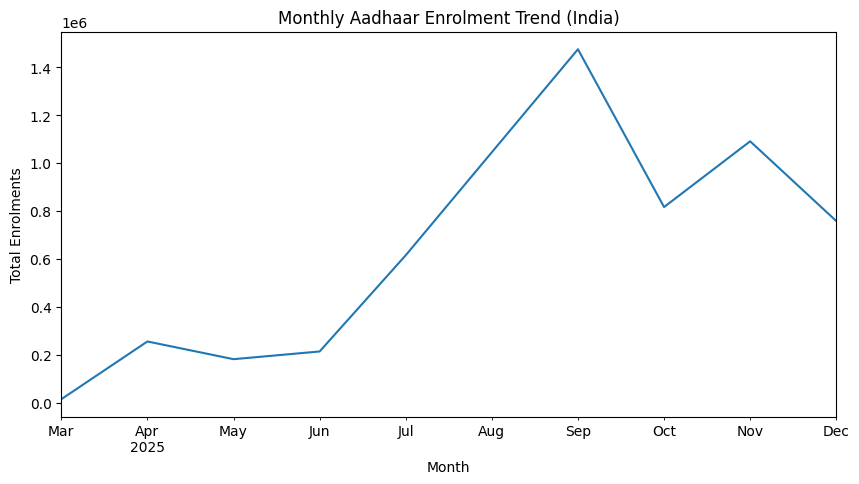

In [ ]:
india_enrolment_trend = (
    enrolment_monthly
    .groupby('year_month')['total_enrolment']
    .sum()
)

india_enrolment_trend.plot(kind='line', figsize=(10,5))
plt.title("Monthly Aadhaar Enrolment Trend (India)")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.show()


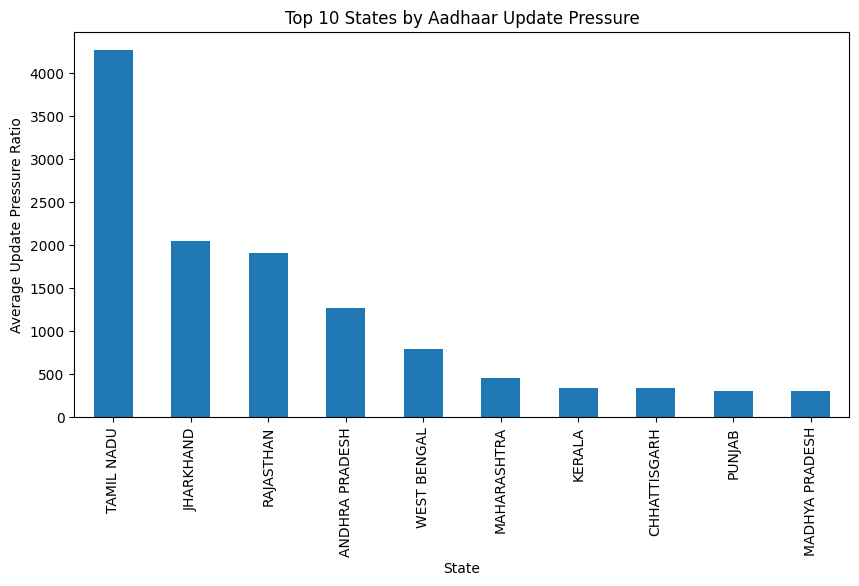

In [ ]:
top_pressure_states = (
    merged_df
    .groupby('state')['update_pressure_ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_pressure_states.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Aadhaar Update Pressure")
plt.xlabel("State")
plt.ylabel("Average Update Pressure Ratio")
plt.show()


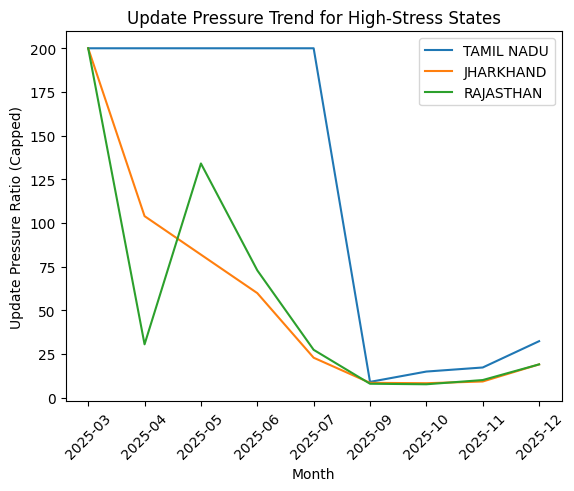

In [ ]:
high_states = top_pressure_states.index.tolist()

filtered_df = merged_df[merged_df['state'].isin(high_states)]

for state in high_states[:3]:  # plot top 3 only
    state_data = filtered_df[filtered_df['state'] == state]
    plt.plot(state_data['year_month'].astype(str),
             state_data['update_pressure_ratio_capped'],
             label=state)

plt.title("Update Pressure Trend for High-Stress States")
plt.xlabel("Month")
plt.ylabel("Update Pressure Ratio (Capped)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


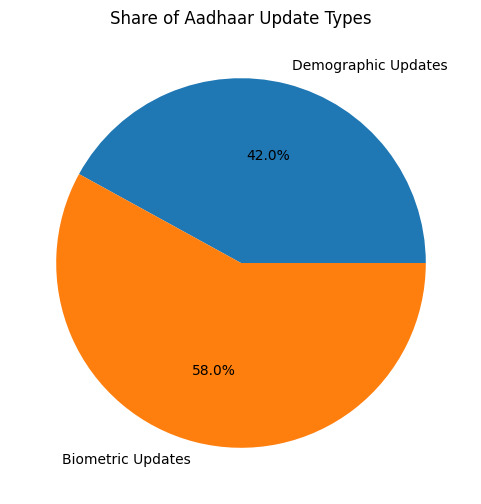

In [ ]:
update_type_share = {
    'Demographic Updates': merged_df['total_demo_updates'].sum(),
    'Biometric Updates': merged_df['total_bio_updates'].sum()
}

pd.Series(update_type_share).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Share of Aadhaar Update Types")
plt.ylabel("")
plt.show()


In [ ]:
plt.savefig("update_type_share", bbox_inches="tight")


In [ ]:
plt.savefig("chart_name.png", bbox_inches="tight")


In [ ]:
plt.savefig("chart_name.png", bbox_inches="tight")
plt.savefig("chart_name.png", bbox_inches="tight")
